In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Bike%20Prices.csv')

In [3]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [5]:
df=df.dropna()

In [6]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [7]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [8]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [10]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [11]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [12]:
df.shape

(626, 8)

In [13]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [32]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [33]:
y=df['Selling_Price']

In [34]:
y.shape

(626,)

In [35]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [36]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]

In [37]:
X.shape

(626, 5)

In [38]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = lr.predict(X_test)

In [46]:
y_pred.shape

(188,)

In [47]:
y_pred

array([ 27210.52271468,  56340.08335161,  63471.94672   ,  53627.63844782,
        55612.75744266,  53888.92259714,  33751.35275099,  60311.49501804,
       113713.05684464,  76639.49332948,  27826.73993814,  49919.83255839,
        65886.64311457,  26755.12664072,  48277.75426035, 127646.56079333,
        70047.10661637,  39350.67963649,  36081.03597878,  45360.79436333,
        48079.89470575,  44803.02464793,  55161.44026111,  71041.51821316,
        91689.22699154,  49301.5359465 ,  55988.19326246, 108171.54600296,
        32771.06897893,  25468.20073016,  17128.61806161, 179271.41130738,
        45698.99857631,  31371.09285074,  67886.52106728,  41492.49575812,
        56855.222386  ,  47820.47003471,  74682.14053955,  24984.21822744,
        55374.00513695,  41412.36775223,  67991.60287763,  26553.59421842,
        89788.69870685,  45764.83633684, 133888.03770386, 106988.11382497,
        71176.40667709,  25332.25485949,  79512.43778821,  63914.3808817 ,
        28632.12110983,  

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
mean_absolute_error(y_test,y_pred)

12225.73701041481

In [50]:
mean_squared_error(y_test,y_pred)

554715615.5045587

In [51]:
r2_score(y_test,y_pred)

0.8810414402984525

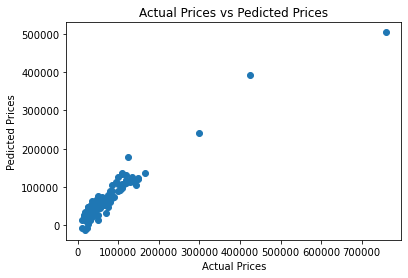

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Pedicted Prices")
plt.title("Actual Prices vs Pedicted Prices")
plt.show()

In [53]:
df_new=df.sample(1)

In [54]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
235,Honda,Honda Aviator,57000,2018,0,0,6465,61118.0


In [55]:
df_new.shape

(1, 8)

In [56]:
X_new = df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [57]:
y_pred_new=lr.predict(X_new)